In [1]:
import skil_client
import cv2
import numpy as np
import matplotlib.pyplot as plt

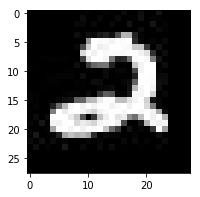

(784,)

In [2]:
image = cv2.imread("mnist-sample/img_1.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(3,3))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

image = np.squeeze(image.reshape(1,-1))
image.shape

## SKIL python client

In [6]:
from skil import Skil, Model, Deployment, Service, WorkSpace, Experiment

from skil import get_workspace_by_id
from skil import get_experiment_by_id
from skil import get_model_by_id
from skil import get_deployment_by_id

Using TensorFlow backend.


In [11]:
workspace_id  = '278d4564-ed47-4334-8130-dc18347a392a'
experiment_id = '278d4564-ed47-4334-8130-dc18347a392a_experiment_75c9e28c-5b51-11e9-8cc7-34e12ddbf19b'
model_id      = '7a0c7986-5b51-11e9-8cc7-34e12ddbf19b'
deployment_id = '1'

In [12]:
skil_server = Skil(
    workspace_server_id=None,
    host='localhost',
    port=9008,
    debug=False,
    user_id='admin',
    password='Skymind',
)

'>>> Authenticating SKIL...'
'>>> Done!'


In [13]:
work_space = get_workspace_by_id(
    skil=skil_server,
    workspace_id=workspace_id
)

In [14]:
experiment = get_experiment_by_id(
    work_space=work_space,
    experiment_id=experiment_id
)

In [19]:
model = get_model_by_id(
    experiment=experiment,
    model_id=model_id
)

model_deployment = skil_server.api.models(deployment_id=deployment_id)
model_deployment

[{'created': 1554874117204,
  'deployment_id': 1,
  'extra_args': None,
  'file_location': None,
  'id': 1,
  'jvm_args': None,
  'labels_file_location': None,
  'launch_policy': {'@class': 'io.skymind.deployment.launchpolicy.DefaultLaunchPolicy',
                    'maxFailuresMs': 300000,
                    'maxFailuresQty': 3},
  'model_state': None,
  'model_type': 'model',
  'name': 'keras-mnist',
  'scale': 1.0,
  'state': 'started',
  'sub_type': None,
  'updated': 1554874160591}]

In [22]:
deployment = get_deployment_by_id(
    skil=skil_server,
    deployment_id=deployment_id
)

# skil_server.api.deployment_get(deployment_id=deployment_id)

In [25]:
service = Service(
    skil=skil_server,
    model=model,
    deployment=deployment,
    model_deployment=model_deployment
)

In [43]:
predicted = service.predict_single(image)
print('Predicted:',predicted)
print('Target Class:',np.argmax(predicted))

Predicted: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Target Class: 2
